<a href="https://colab.research.google.com/github/loguansiang/fyp/blob/main/cnn_techincal_indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras import optimizers
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout
from keras import optimizers
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:

url = 'https://raw.githubusercontent.com/loguansiang/fyp/main/SAND%20fyp.csv'
df = pd.read_csv(url)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

In [ ]:
pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import ta
from ta import add_all_ta_features
from ta.utils import dropna

In [ ]:
def applytechnicals(df):
  for i in range (2,10,4):
    df['rsi_'+str(i)]=ta.momentum.rsi(df.Close,window=i)
    df['SMA_'+str(i)]=df.Close.rolling(i*10).mean()
  df['macd']  =ta.trend.macd_diff(df.Close)
  df.dropna(inplace= True)
  

In [ ]:
applytechnicals(df)
df

,Open,High,Low,Close,Adj Close,Volume,rsi_2,SMA_2,rsi_6,SMA_6,macd
Date,,,,,,,,,,,
2020-10-12,0.048891,0.050484,0.046535,0.047589,0.047589,9049431,45.692130,0.045914,52.276238,0.049379,0.000584
2020-10-13,0.047421,0.049109,0.045674,0.046522,0.046522,7175418,30.796000,0.046106,48.313257,0.049060,0.000434
2020-10-14,0.046483,0.046989,0.045195,0.045895,0.045895,4333146,22.265172,0.046012,45.861645,0.048975,0.000280
2020-10-15,0.045956,0.046236,0.044238,0.045027,0.045027,3469517,12.600755,0.045829,42.296152,0.048712,0.000116
2020-10-16,0.045025,0.045025,0.041341,0.043696,0.043696,6499827,5.405304,0.045687,37.002657,0.048540,-0.000076
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-13,2.781983,2.886945,2.751847,2.869923,2.869923,321784424,65.808704,3.234065,40.737599,3.209165,-0.066120
2022-04-14,2.869366,2.916186,2.714203,2.780882,2.780882,349909147,37.201068,3.204703,35.951236,3.187497,-0.060530
2022-04-15,2.781060,2.820187,2.755915,2.803639,2.803639,189256519,48.618327,3.175205,38.178917,3.167078,-0.051785


In [ ]:
validate = df[['Open','High',	'Low'	,	'Volume','rsi_2','SMA_2','rsi_6','SMA_6','macd','Close']].tail(10)

In [ ]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon

    for i in range(start, end):
        indices = range(i-window, i)
        X.append(dataset[indices])

        indicey = range(i+1, i+1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [ ]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X_data = X_scaler.fit_transform(df[['Open','High',	'Low'	,	'Volume','rsi_2','SMA_2','rsi_6','SMA_6','macd']])
Y_data = Y_scaler.fit_transform(df[['Close']])

In [ ]:
hist_window = 20
horizon = 10
TRAIN_SPLIT = 350
x_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, 0, TRAIN_SPLIT, hist_window, horizon)
x_vali, y_vali = custom_ts_multi_data_prep(X_data, Y_data, TRAIN_SPLIT, None, hist_window, horizon)

In [ ]:
x_train

array([[[2.40970507e-03, 2.21860599e-03, 2.54364021e-03, ...,
         4.87758113e-01, 1.54748855e-03, 4.59140825e-01],
        [2.21368567e-03, 2.05511474e-03, 2.41917589e-03, ...,
         4.42115373e-01, 1.48936441e-03, 4.58934951e-01],
        [2.08860663e-03, 1.80304096e-03, 2.34993267e-03, ...,
         4.13879489e-01, 1.47395725e-03, 4.58723850e-01],
        ...,
        [5.90325069e-04, 8.79047865e-04, 6.15527394e-04, ...,
         3.35154815e-01, 7.29474128e-04, 4.57728307e-01],
        [8.90621445e-04, 7.99739746e-04, 7.62253628e-04, ...,
         2.46489914e-01, 6.24718167e-04, 4.57727676e-01],
        [6.53264630e-04, 5.73111147e-04, 8.79490058e-04, ...,
         2.40354756e-01, 5.50822130e-04, 4.57773364e-01]],

       [[2.21368567e-03, 2.05511474e-03, 2.41917589e-03, ...,
         4.42115373e-01, 1.48936441e-03, 4.58934951e-01],
        [2.08860663e-03, 1.80304096e-03, 2.34993267e-03, ...,
         4.13879489e-01, 1.47395725e-03, 4.58723850e-01],
        [2.01833301e-03, 

In [ ]:
print ('Multiple window of past history\n')
print(x_train[0])
print ('\n Target horizon\n')
print (y_train[0])

Multiple window of past history

[[2.40970507e-03 2.21860599e-03 2.54364021e-03 5.80760036e-04
  4.56912130e-01 1.49922790e-03 4.87758113e-01 1.54748855e-03
  4.59140825e-01]
 [2.21368567e-03 2.05511474e-03 2.41917589e-03 4.11554601e-04
  3.07332958e-01 1.53082269e-03 4.42115373e-01 1.48936441e-03
  4.58934951e-01]
 [2.08860663e-03 1.80304096e-03 2.34993267e-03 1.54924649e-04
  2.21670824e-01 1.51534165e-03 4.13879489e-01 1.47395725e-03
  4.58723850e-01]
 [2.01833301e-03 1.71350721e-03 2.21159079e-03 7.69472175e-05
  1.24625788e-01 1.48528347e-03 3.72814724e-01 1.42587255e-03
  4.58498536e-01]
 [1.89418740e-03 1.56951600e-03 1.79280666e-03 3.50555202e-04
  5.23728167e-02 1.46193867e-03 3.11848092e-01 1.39455670e-03
  4.58235174e-01]
 [1.71190270e-03 1.47950664e-03 1.98868256e-03 4.26442590e-05
  3.63532223e-02 1.46429698e-03 2.89606359e-01 1.36874536e-03
  4.58035905e-01]
 [1.64616286e-03 1.39330216e-03 1.92449887e-03 9.55751258e-05
  2.08543261e-02 1.47142121e-03 2.62387963e-01 1.3400

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evalution
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import tensorflow as tf

In [ ]:
batch_size = 256
buffer_size = 150

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
import tensorflow as tf

In [ ]:
# define model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=256, kernel_size=1, activation='relu', input_shape=( x_train.shape[-2:])))
cnn_model.add(MaxPooling1D(pool_size=1))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(10))
cnn_model.compile(optimizer='adam', loss='mse')
cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 20, 256)           2560      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 20, 256)          0         
 1D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 5120)              0         
                                                                 
 dense_10 (Dense)            (None, 50)                256050    
                                                                 
 dense_11 (Dense)            (None, 10)                510       
                                                                 
Total params: 259,120
Trainable params: 259,120
Non-trainable params: 0
________________________________________________

In [ ]:
model_path = 'CNN_Multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint]

In [ ]:
history = cnn_model.fit(train_data,epochs=50,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1,callbacks=callbacks)

Epoch 1/50
100/100 [==============================] - 4s 32ms/step - loss: 5.2613e-04 - val_loss: 0.0412
Epoch 2/50
100/100 [==============================] - 4s 42ms/step - loss: 9.7668e-05 - val_loss: 0.0713
Epoch 3/50
100/100 [==============================] - 5s 51ms/step - loss: 7.2707e-05 - val_loss: 0.0851
Epoch 4/50
100/100 [==============================] - 5s 49ms/step - loss: 5.9447e-05 - val_loss: 0.0963
Epoch 5/50
100/100 [==============================] - 6s 59ms/step - loss: 5.1512e-05 - val_loss: 0.0985
Epoch 6/50
100/100 [==============================] - 5s 52ms/step - loss: 4.0803e-05 - val_loss: 0.1023
Epoch 7/50
100/100 [==============================] - 5s 50ms/step - loss: 4.0048e-05 - val_loss: 0.1000
Epoch 8/50
100/100 [==============================] - 5s 48ms/step - loss: 2.7810e-05 - val_loss: 0.0989
Epoch 9/50
100/100 [==============================] - 5s 47ms/step - loss: 2.6539e-05 - val_loss: 0.0943
Epoch 10/50
100/100 [==============================] - 

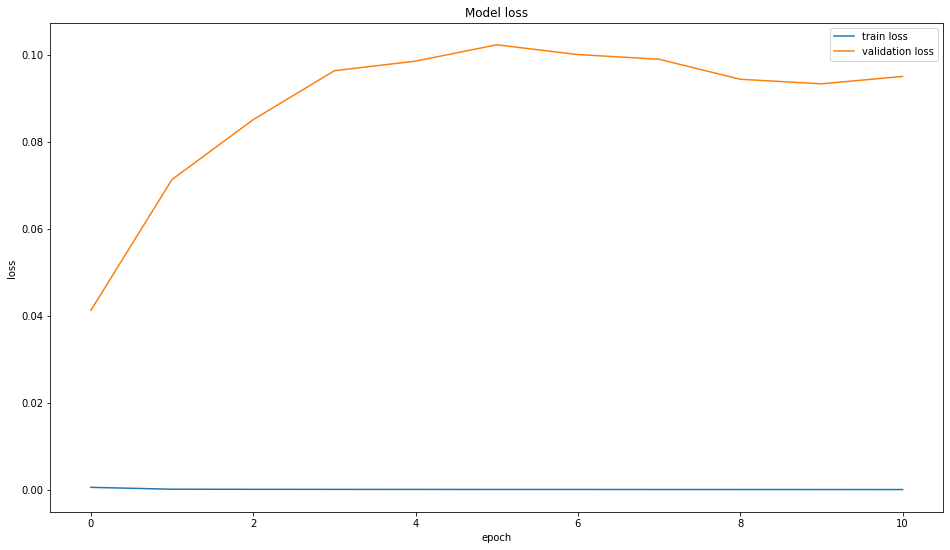

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'rsi_2', 'SMA_2',
       'rsi_6', 'SMA_6', 'macd'],
      dtype='object')

In [ ]:
model_path = 'CNN_Multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint]

In [ ]:
  data_val = X_scaler.fit_transform(df[['Open','High',	'Low'	,	'Volume','rsi_2','SMA_2','rsi_6','SMA_6','macd']].tail(20))
  val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])

In [ ]:
pred =cnn_model.predict(val_rescaled)
pred

array([[0.28873414, 0.24640599, 0.35613483, 0.35315844, 0.31583676,
        0.15721114, 0.07231554, 0.3331196 , 0.16754182, 0.19865924]],
      dtype=float32)

In [ ]:
pred_Inverse = Y_scaler.inverse_transform(pred)

In [ ]:
pred_Inverse

array([[2.447921 , 2.0935764, 3.0121572, 2.9872408, 2.674807 , 1.3468935,
        0.6362011, 2.819488 , 1.4333754, 1.6938709]], dtype=float32)

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
pred_Inverse[0]

array([2.447921 , 2.0935764, 3.0121572, 2.9872408, 2.674807 , 1.3468935,
       0.6362011, 2.819488 , 1.4333754, 1.6938709], dtype=float32)

In [ ]:
timeseries_evaluation_metrics_func(validate['Close'],pred_Inverse[0])

Evaluation metric results:-
MSE is : 1.1215588743235156
MAE is : 0.8078764607738496
RMSE is : 1.0590367672198713
MAPE is : 28.511438150807155
R2 is : -150.38538218829015



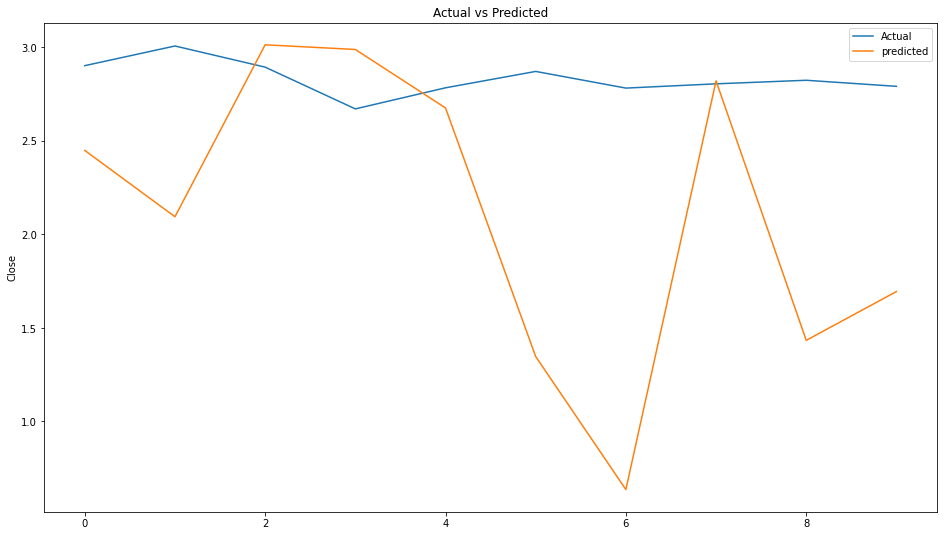

In [ ]:
plt.figure(figsize=(16,9))
plt.plot( list(validate['Close']))
plt.plot( list(pred_Inverse[0]))
plt.title("Actual vs Predicted")
plt.ylabel("Close")
plt.legend(('Actual','predicted'))
plt.show()